# Проект по машинному обучению

## Содержание
- [Первоначальные цели](#Первоначальные-цели)
- [Подробная информация о признаках](#Подробная-информация-о-признаках)
- [% пропусков](#%-пропусков)
- [Топ 10 признаков с наибольшей корреляцией](#Оценка-плотности-распределения)
- [Оценка плотности распределения](#Оценка-плотности-распределения)
- [График рассеивная с  топ 1 признаком корреляции (отделка дома)](#График-рассеивная-с-топ-1-признаком-корреляции (отделка-дома))
- [График рассеивная с  топ 2 признаком корреляции (Площадь дома)](#График-рассеивная-с-топ-2-признаком-корреляции (Площадь-дома))
- [Очистка данных](#Очистка-данных)
- [Работа с отсутствующими данными в колонках](#Работа-с-отсутствующими-данными-в-колонках)
- [Удаление колонок с признаками](#Удаление-колонок-с-признаками)
- [Замена отсутствующих данных каким-то другим значением](#Замена-отсутствующих-данных-каким-то-другим-значением)
- [Работа с категориальными данными (Categorical Data)](#Работа-с-категориальными-данными-(Categorical-Data))
- [Создание Dummy-переменных](#Создание-Dummy-переменных)
- [Разбиение на признаки и таргет](#Разбиение-на-признаки-и-таргет)
- [Масштабирование признаков](#Масштабирование-признаков)
- [Создадим модель ElasticNet](#Создадим-модель-ElasticNet)
- [Создание словаря с набором различных значений этих параметров, для поиска по сетке. (GridSearchCV)](#Создание-словаря-с-набором-различных-значений-этих-параметров,-для-поиска-по-сетке.-(GridSearchCV))
- [Оценка работы модели](#Оценка-работы-модели-и-Вывод)

## Первоначальные цели
* Поиск и удаление выбросов
* Исправление / очистка отсутствующих данных
* Работа с категориальными переменными

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Подробная информация о признаках

In [3]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## % пропусков

In [5]:
pd.DataFrame(round((df.isna().mean() * 100), 2).to_dict(), index=[0])

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.0,0.0,0.0,16.72,0.0,0.0,93.24,0.0,0.0,0.0,...,0.0,99.56,80.48,96.38,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

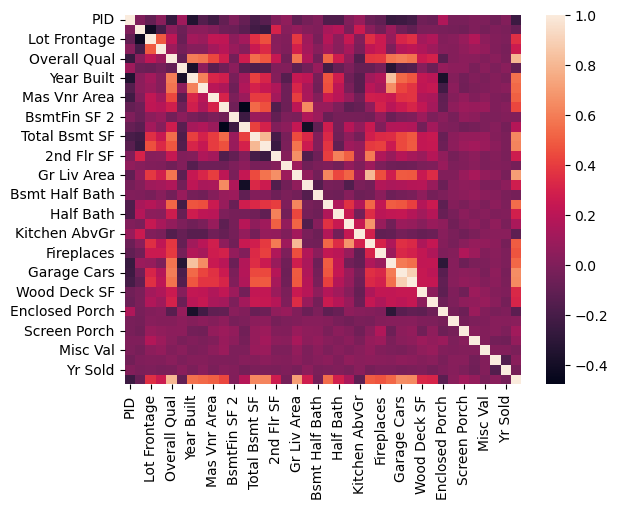

In [6]:
sns.heatmap(df.corr())

## Топ 10 признаков с наибольшей корреляцией

In [7]:
df.corr()['SalePrice'].sort_values().tail(10)

Year Remod/Add    0.532974
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632280
Garage Area       0.640401
Garage Cars       0.647877
Gr Liv Area       0.706780
Overall Qual      0.799262
SalePrice         1.000000
Name: SalePrice, dtype: float64

## Оценка плотности распределения

<Axes: xlabel='SalePrice', ylabel='Density'>

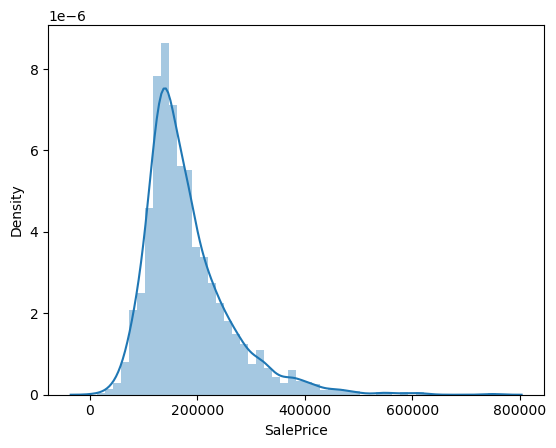

In [8]:
sns.distplot(df["SalePrice"])

## График рассеивная с  топ 1 признаком корреляции (отделка дома) 

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

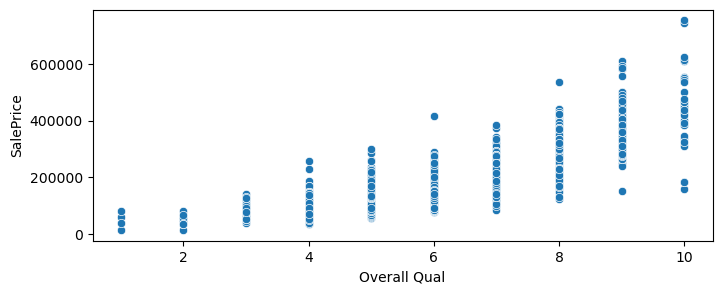

In [9]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)


## Посмотрим на выбросы в правой нижней части графика

In [10]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


## График рассеивная с  топ 2 признаком корреляции (Площадь дома) 

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

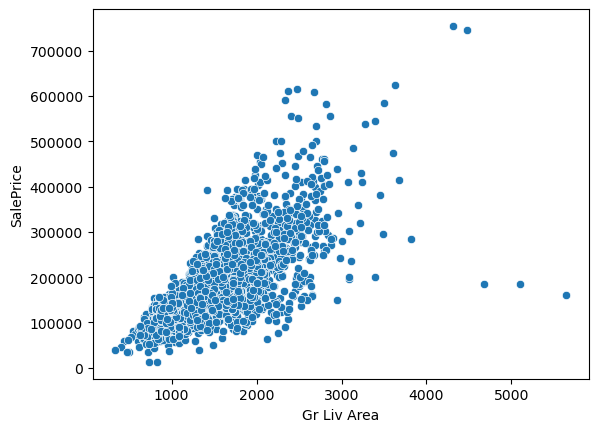

In [11]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

## Посмотрим на выбросы в правой нижней части графика
* Следует сказать, что точки в верхней части графика не являются выбросами (Скорее всего) так как они соответствуют линии тренда

In [12]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


## Все выбросы из последнего графика совпадают с выбросами из первого графика, поэтому мы можем удалить их

In [13]:
drop_unnecessary_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(drop_unnecessary_ind, axis = 0)

Text(0.5, 1.0, 'graph without outliers')

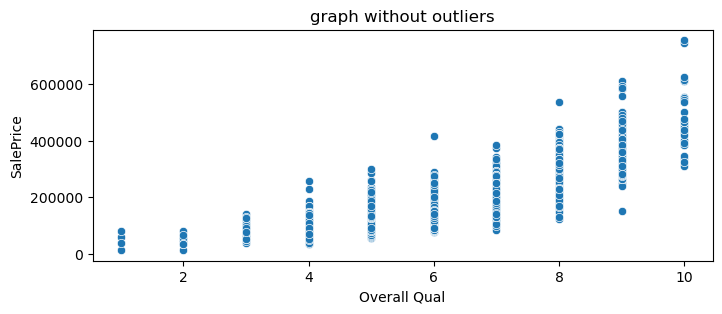

In [14]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)
plt.title('graph without outliers')

Text(0.5, 1.0, 'graph without outliers')

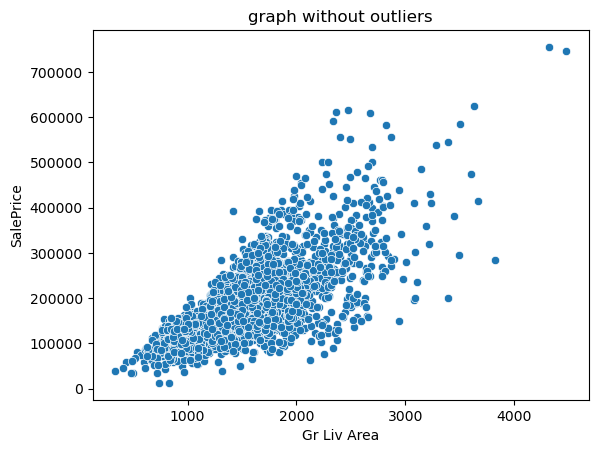

In [15]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)
plt.title('graph without outliers')


# Очистка данных

In [16]:
print(f"Count of columns: {len(df.columns)}")

Count of columns: 81


### Удаление колонки PID
У нас уже есть индекс, поэтому для работы регрессии нам не нужен уникальный идентификатор PID.

In [17]:
df = df.drop('PID',axis=1)

In [18]:
## Создадим график с % пропущенных данных

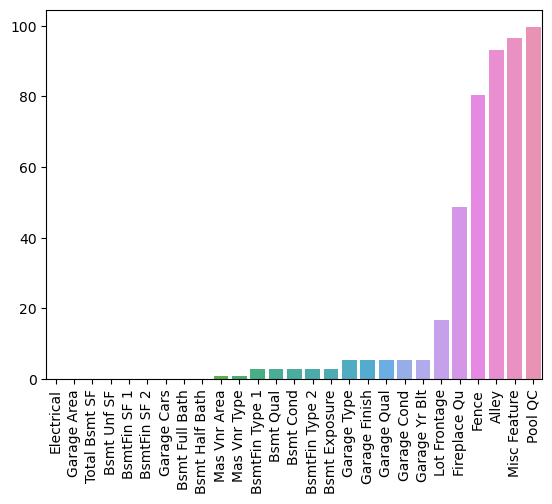

In [19]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan


percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Удаление признаков или удаление строк

Если значения отсутствуют только в нескольких строках, количество которых мало по сравнению с общим количеством строк, то можно рассмотреть вариант удалить такие строки. Мы удаляем некоторые данные для обучения и тестирования, но поскольку таких строк очень мало, то скорее всего мы не сильно повлияем на точность модели.

Если же значения отсутствуют почти во всех строках, то имеет смысл полностью удалить такие признаки. Однако перед этим надо разобраться, почему неопределённых значений так много. В некоторых случаях можно рассмотреть такие данные как отдельную категорию, отдельно от остальных данных. 

В качестве примера возьмём признак "количество машин, которые могут поместиться в гараже". Но если гаража вообще нет, то вместо значения 0 может проставляться неопределённое значение null. В таким случае имеет смысл заменить значения null на нули. Поэтому во многом нам необходимо знать предметную область признаков

## Работа с отсутствующими данными в строках

## Замена или удаление данных

Выберем некоторое пороговое значение (threshold) и при его привышении мы решаем удалять строки (вместо того, чтобы заменять отсутствующее значение каким-то другим значением). Здесь нет правильного ответа на вопрос, какое следует выбрать пороговое значение. Для выбора порогового значения необходимо использовать знания о специфике предметной области, но в любом случае пороговое значение не должно быть большим (30%). 

Глядя на текстовое описание признаков, мы видим, что в нашем случае значения NaN проставляются намеренно - они означают 0 или "нисколько".

## Рассмотрим левую часть графика, где % маленький

(0.0, 1.0)

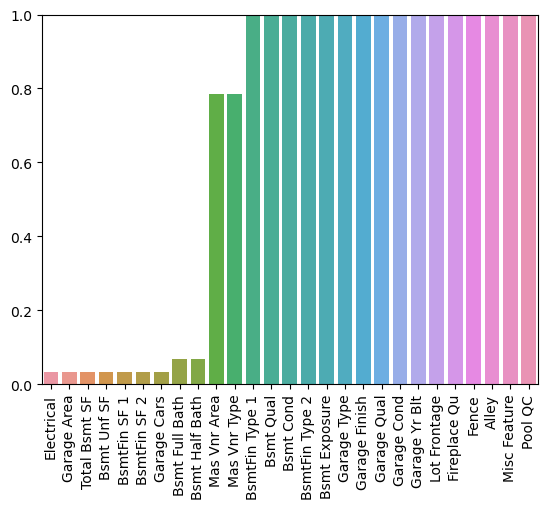

In [20]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [21]:
# Сравниваем с пороговым значением
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [22]:
print(f"1 line in percent: {round(100 / len(df), 3)}")

1 line in percent: 0.034


### Значит для признаков: Electrical, Garage Area, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2, Garage Cars пропущена 1 строка

In [23]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [24]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Удалим эти данные и посмотрим на изменения

In [25]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

(0.0, 1.0)

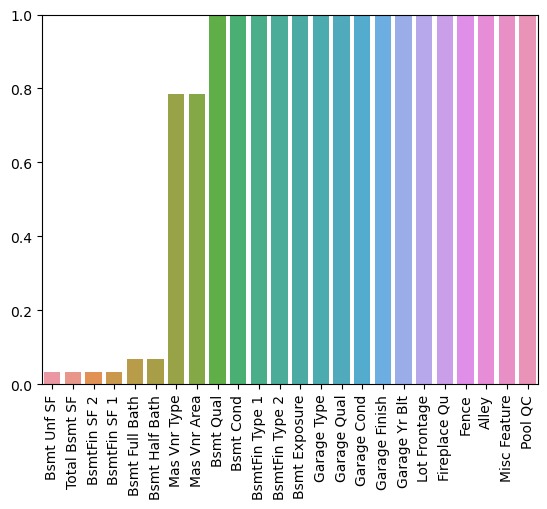

In [26]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 1, BsmtFin SF 2 - данные признаки отвечают за подвальное помещение, а значение NaN соответствует его отсутствию. 
**Значит мы можем заменить эти значения на 0 в числовых колонках и на None в текстовых, тем более у них одинаковые индексы**

In [27]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [28]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [29]:
# Заполнение для числовых колонок
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# Заполнение для строковых колонок
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

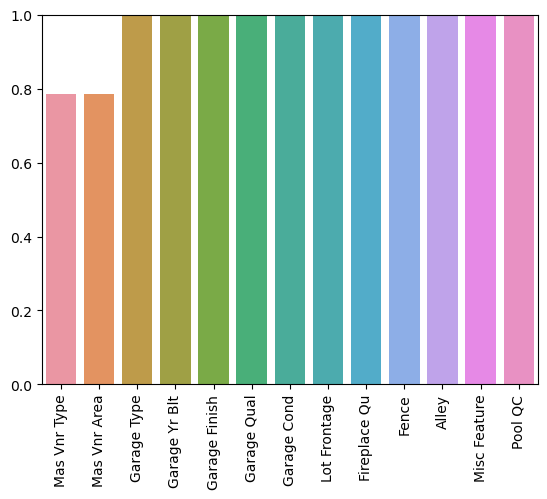

In [30]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Признак Mas VNR
**На основе текстового описания набора данных, отсутствие данных в признаках Mas Vnr Type и Mas Vnr Area скорее всего означает, что дом не имеет облицовки каменной плиткой, и в этом случае мы укажем нулевое значение, как мы делали раньше для других признаков.**

In [31]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

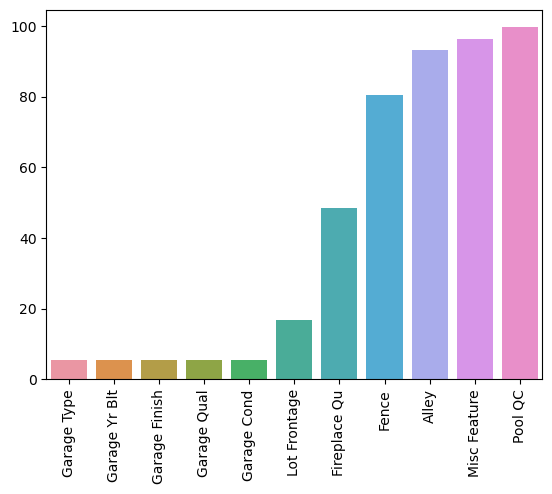

In [32]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Работа с отсутствующими данными в колонках

Ранее мы смотрели на отсутствие данных в строках; теперь посмотрим на колонки признаков, поскольку здесь есть достаточно большой процент отсутствующих значений.

### Колонки Garage

Судя по описанию данных, значение NaN означает отсутствие гаража, так что мы запишем значение "None" или 0 в зависимости от типа данных.

In [33]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Yr Blt']].head()

,Garage Type,Garage Finish,Garage Qual,Garage Cond,Garage Yr Blt
0,Attchd,Fin,TA,TA,1960.0
1,Attchd,Unf,TA,TA,1961.0
2,Attchd,Unf,TA,TA,1958.0
3,Attchd,Fin,TA,TA,1968.0
4,Attchd,Fin,TA,TA,1997.0


In [34]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

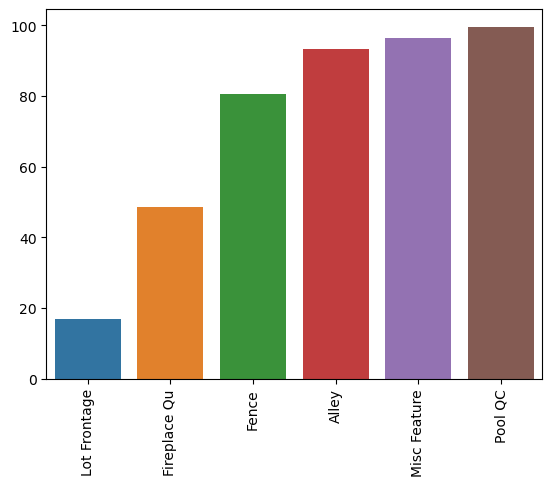

In [35]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Удаление колонок с признаками

Если значения отсутствуют в достаточно большом количестве строк, то имеет смысл удалить такие колонки полностью. В нашем наборе данных, многие из признаков с большим количеством значений NaN по сути должны содержать значения "none" или 0. В данном случае я удалю данные признаки.

Исходя из описания признаков мы можем сделать определенные выводы:
   1. PoolQC: Pool quality - качество бассейна. 
       - NaN - Бассейна нет
   2. MiscFeature: Miscellaneous feature not covered in other categories - Разные функции, не вошедшие в другие категории. 
       - NaN - Нет доп факторов. (Из тех что есть - теннисный корт, лифт, 2ой гараж)
   3. Alley: Type of alley access to property - Тип подъезда к собственности. 
       - NaN - нет подьезда
   4. Fence: Fence quality - Качество забора. 
       - NaN - забора нет
   5. FireplaceQu: Fireplace quality - качество камина  
       - Nan - камина нет  
       
**Заполню пропуски в данных на None, так как факт отсутствия каждого из факторов тоже сыграет роль на его цене, относительно хоть каких-то значений / плюсов**

In [36]:
filling_cols = ['Fence', 'Alley', 'Misc Feature', 'Pool QC', 'Fireplace Qu']
df[filling_cols] = df[filling_cols].fillna('None')

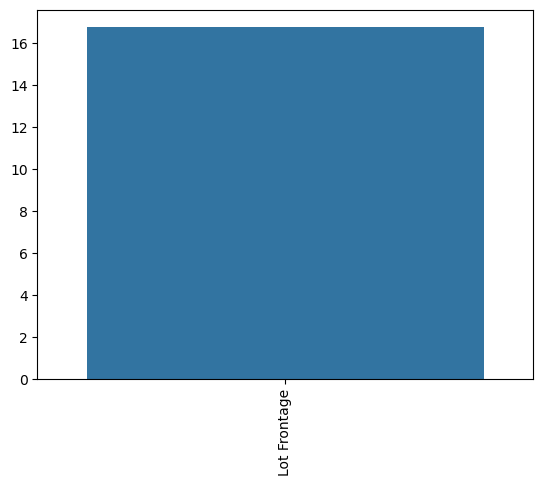

In [37]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Замена отсутствующих данных каким-то другим значением
**LotFrontage: длина дороги прилегаюшая к стороне дома (со стороны улицы), в футах**

Чтобы заменить отсутствующие данные в заданном признаке, нам нужно решить, какой из других признаков (без значений NaN) лучше всего коррелирует с нашим признаком. В нашем примере мы будем работать со следующими признаками:

Признак Lot Frontage хорошо коррелирует с признаком neighborhood.

In [38]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

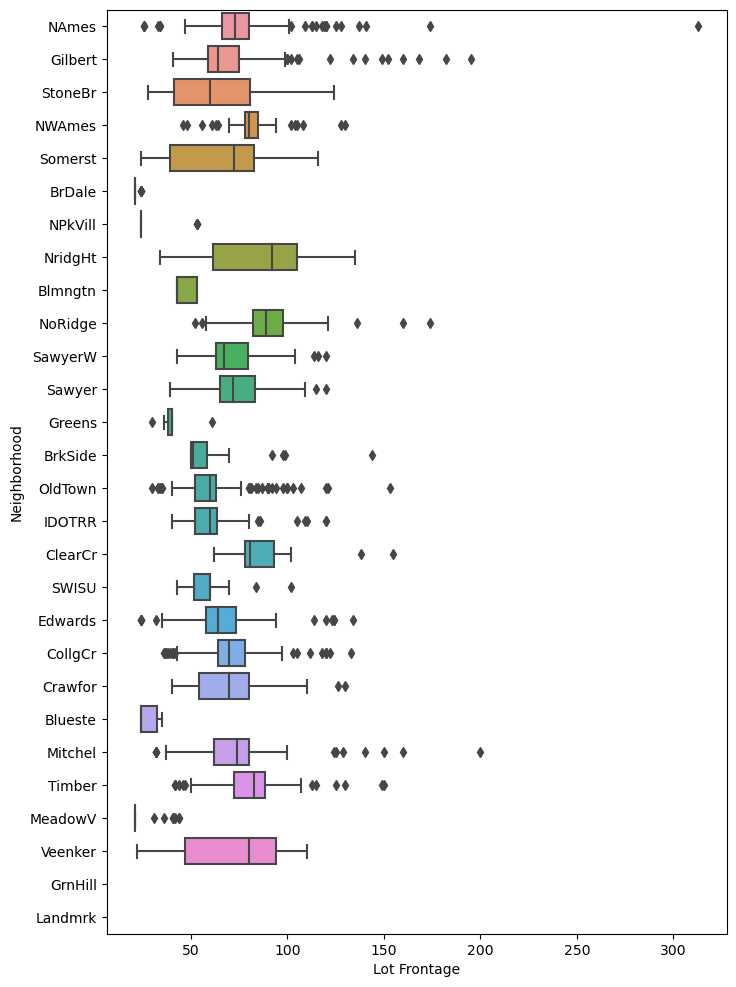

In [39]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

### Где-то мы видим отсутствующие данные, а где-то в целом много выбросов, поэтому мы заполним все таки средними значениями пропуски, тем более их доля не супер большая

In [40]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [41]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [42]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [43]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

## Теперь во всём нашем наборе данных нет отсутствующих значений

In [44]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


## Работа с категориальными данными (Categorical Data)

## Числовые колонки для категорий

При переводе категорийных значений в числовые значения нужно быть аккуратными и следить за тем, что числовые связи имеют смысл для модели. Например, числа в колонке MSSubClass - это просто некоторый код для каждого класса:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Здесь каждое число не связано с другими числами в этой же колонке. Например, 30 > 20, однако это не значит, что значение "1-STORY 1945 & OLDER" в каком-то смысле больше значения "1-STORY 1946 & NEWER ALL STYLES".  Хотя в других случаях вполне может быть, что например в поезде 1й класс и 2й класс вагонов действительно идут по порядку, если назначить им числа 1 и 2.

In [45]:
# Конвертация в строку
df['MS SubClass'] = df['MS SubClass'].apply(str)

## Создание Dummy-переменных

In [46]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Fin,TA,TA,P,None,None,None,WD,Normal
1,20,RH,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
2,20,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,None,None,Gar2,WD,Normal
3,20,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
4,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,None,MnPrv,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,None,GdPrv,None,WD,Normal
2926,20,RL,Pave,None,IR1,Low,AllPub,Inside,Mod,Mitchel,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
2927,85,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,None,None,None,None,Y,None,MnPrv,Shed,WD,Normal
2928,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [47]:
df_nums = df.select_dtypes(exclude='object') # Датафрейм числовыми колонками
df_objs = df.select_dtypes(include='object') # Датафрейм текстовыми колонками

In [48]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [49]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Alley           2925 non-null   object
 4   Lot Shape       2925 non-null   object
 5   Land Contour    2925 non-null   object
 6   Utilities       2925 non-null   object
 7   Lot Config      2925 non-null   object
 8   Land Slope      2925 non-null   object
 9   Neighborhood    2925 non-null   object
 10  Condition 1     2925 non-null   object
 11  Condition 2     2925 non-null   object
 12  Bldg Type       2925 non-null   object
 13  House Style     2925 non-null   object
 14  Roof Style      2925 non-null   object
 15  Roof Matl       2925 non-null   object
 16  Exterior 1st    2925 non-null   object
 17  Exterior 2nd    2925 non-null   object
 18  Mas Vnr 

In [50]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


## Резюме

мы не знаем, будут ли полезны все 288 колонок. Большее количество колонок может и не привести к улучшенным результатам. Мы даже можем захотеть удалить некоторые колонки, или использовать модель с регуляризацией для выбора только важных колонок. Сейчас же мы значительно увеличили соотношение колонок и строк, и это может снизить точность модели (однако мы не узнаем об этом до тех пор, пока не сравним разные модели и подходы).

In [51]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 288, dtype: float64

Эту колонку скорее всего заполнял риелтор, а это значит, что эта колонка может содержать обобщённую информацию с других признаков. Но если бы мы захотели использовать этот признак для предсказывания цены дома, то для каждого нового дома для применения нашей модели нам пришлось бы спрашивать риелтора!

In [52]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


## Разбиение на признаки и таргет

In [53]:
X = final_df.drop('SalePrice', axis = 1)
y = final_df['SalePrice']

## Разбиение X и y на обучающий и тестовый наборы данных.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Масштабирование признаков

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Создадим модель ElasticNet

In [56]:
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

## Создание словаря с набором различных значений этих параметров, для поиска по сетке. (GridSearchCV)

In [57]:
param_grid = {'alpha': [0.1,1,5,10,50,100],
              'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]}

In [58]:
from sklearn.model_selection import GridSearchCV
# Число verbose можете выбрать другое
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [59]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.99}

## Отображение наилучшей комбинации параметров для нашей модели

In [61]:
grid_model.best_estimator_

ElasticNet(alpha=5, l1_ratio=0.99)

## Оценка работы модели

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = grid_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE ** 0.5

print(f"MAE:   {round(MAE, 2)}")
print(f"RMSE:  {round(RMSE, 2)}")
print(f"mean: {round(df['SalePrice'].mean(), 2)}")

MAE:   14309.76
RMSE:  21166.99
mean: 180815.54


> **Вывод**: Модель обучена хорошо, о чем свидетельствуют метрики MAE и RMSE. Модель выдает предсказание цены которые в среднем на 8-11% отличаются от истинных значений.

- Дополнительно хотелось бы сказать, что модель можно изучить лучше и потестить с удалением некоторых признаков. Ведь если мы дропнем например 20-30 признаков, а ошибка увеличится на 500 единиц, это будет являться хорошей оптимизацией, так как мы упростим модель